# Data Analyst: Analyzing Manufacturing Data to Optimize Production Efficiency

You’ve been hired as a Data Analyst on the *manufacturing team* at SpaceX. Your first task is to analyze data from one of the rocket production lines. The goal is to identify bottlenecks and inefficiencies in the process that are affecting the overall production time and suggest ways to improve throughput.

## Step 1: Generate Data

Here, we will use a Python script to generate pseudo-data to mock manufacturing datasets. Run the following cell to generate data in the dataset/generated directory.

In [5]:
!python3 ../src/data_generator.py

Data generated.


You have access to a dataset that includes the following columns for the past month:
- **Step_ID**: Identifier for the production step (e.g., Assembly, Welding, Inspection, Testing).
- **Duration (hours)**: Time taken for that step to complete.
- **Start_Time**: When the step started.
- **End_Time**: When the step ended.
- **Operator_ID**: The ID of the operator responsible for that step.
- **Machine_ID**: The ID of the machine used in that step (if applicable).
- **Fault_Flag**: A binary flag (1 or 0) indicating if there was a fault during the process that caused a delay.

## Step 2: Cleaning the Data

Step 1: Import the required modules for data manipulation.

**Pandas**: Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.

**Numpy**: NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

In [6]:
import pandas as pd
import numpy as np

Step 2: Load the dataset into Python via Pandas

In [7]:
df = pd.read_csv("../dataset/generated/synthetic_manufacturing_data.csv")

Step 3: Check for missing values. Handle this data by either dropping missing rows or filling them with null values.

In [8]:
df.isnull().sum() # This will show if any columns have missing values

df.dropna() # To drop rows with missing values
# OR
df.fillna(value=0) # To fill missing values with 0

,Step_ID,Duration,Start_Time,End_Time,Operator_ID,Machine_ID,Fault_Flag
0,Inspection,9.726262,2023-09-01 00:00:00,2023-09-01 01:00:00,101,204,1
1,Testing,7.976195,2023-09-01 01:00:00,2023-09-01 02:00:00,104,209,0
2,Assembly,9.455490,2023-09-01 02:00:00,2023-09-01 05:00:00,100,204,0
3,Inspection,9.053446,2023-09-01 03:00:00,2023-09-01 05:00:00,100,206,0
4,Inspection,6.381100,2023-09-01 04:00:00,2023-09-01 09:00:00,104,208,0
...,...,...,...,...,...,...,...
95,Welding,1.331983,2023-09-04 23:00:00,2023-09-05 05:00:00,107,209,1
96,Welding,6.486079,2023-09-05 00:00:00,2023-09-05 06:00:00,102,204,0
97,Testing,5.524111,2023-09-05 01:00:00,2023-09-05 04:00:00,109,208,0
98,Welding,1.463309,2023-09-05 02:00:00,2023-09-05 08:00:00,106,207,1


Step 4: Verify that the **Start Time** and **End Time** columns are properly formatted as dates

In [9]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

Step 5: Ensure the **Duration** column is consistent with **Start Time** and **End Time**. You can calculate the
duration and compare:

In [10]:
df["Calculated_Duration"] = (df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 3600

# Step 3: Exploratory Data Analysis (EDA)

We will start analyzing the dataset to get a sense of the production steps and faults.

Step 1: Calculate the average time for each production step.

In [11]:
avg_duration_per_step = df.groupby("Step_ID")['Duration'].mean()
print(avg_duration_per_step)

Step_ID
Assembly      5.367758
Inspection    5.248578
Testing       5.828732
Welding       4.982649
Name: Duration, dtype: float64


Step 2: Check how many faults occured during each step:

In [12]:
faults_per_step = df.groupby("Step_ID")["Fault_Flag"].sum()
print(faults_per_step)

Step_ID
Assembly      7
Inspection    6
Testing       9
Welding       4
Name: Fault_Flag, dtype: int64


# Step 4: Visualizing the Data
Creating visualizations will help in understanding trends better.

Step 1A: Import Matplotlib.

**Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. 

In [13]:
import matplotlib.pyplot as plt

Step 1B: Create the bar chart of average duration per step

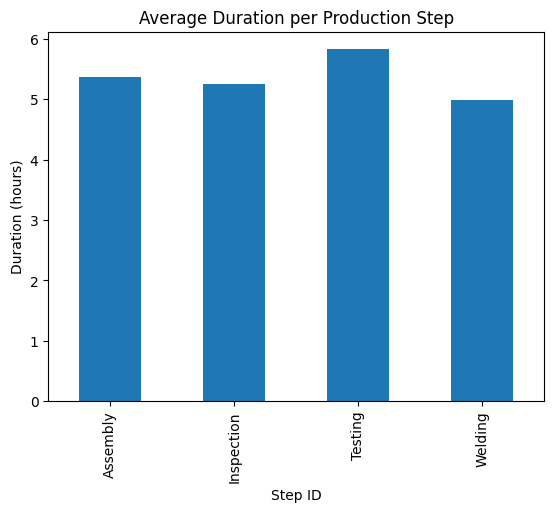

In [14]:
avg_duration_per_step.plot(kind='bar')
plt.title('Average Duration per Production Step')
plt.xlabel('Step ID')
plt.ylabel('Duration (hours)')
plt.show()

Step 2: Visualize faults in each step using bar chart.

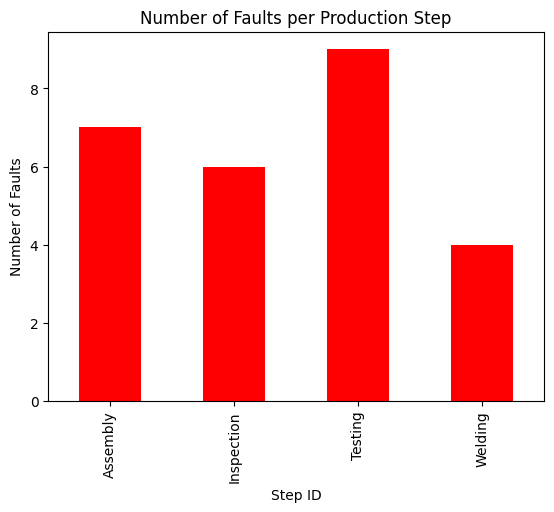

In [15]:
faults_per_step.plot(kind='bar', color='red')
plt.title('Number of Faults per Production Step')
plt.xlabel('Step ID')
plt.ylabel('Number of Faults')
plt.show()

# Step 5: Bottleneck Identification

You can identify bottlenecks by looking at the steps that take the longest:

- From the average duration per step calculated earlier, the step with the highest duration represents a potential bottleneck.
- Additionally, compare the the number of faults in each step with the duration to see if there's a correlation.

# Step 6: Operator and Machine Performance Analysis

We will now evaulate the operator and machine performance.

Step 1: Operator performance

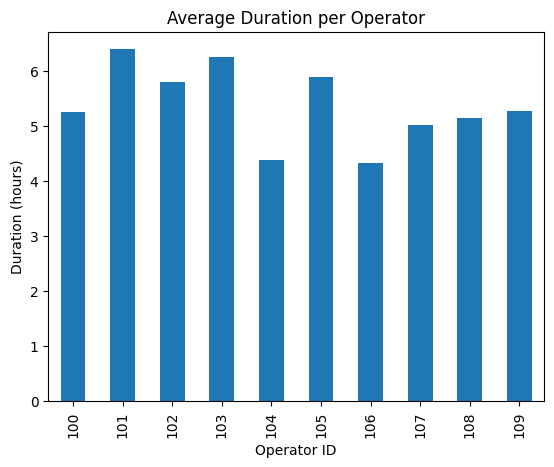

In [16]:
avg_duration_per_operator = df.groupby("Operator_ID")["Duration"].mean()
avg_duration_per_operator.plot(kind="bar")
plt.title("Average Duration per Operator")
plt.xlabel("Operator ID")
plt.ylabel("Duration (hours)")
plt.show()

Step 2: Machine performance

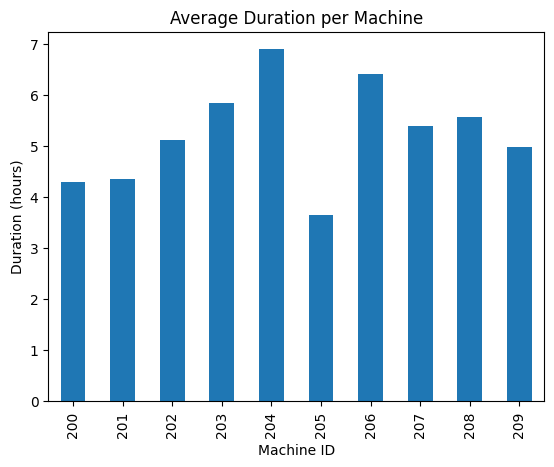

In [17]:
avg_duration_per_machine = df.groupby('Machine_ID')["Duration"].mean()
avg_duration_per_machine.plot(kind="bar")
plt.title("Average Duration per Machine")
plt.xlabel("Machine ID")
plt.ylabel("Duration (hours)")
plt.show()

# Step 7: Fault Analysis

Investigate the steps and machines with the highest number of faults.

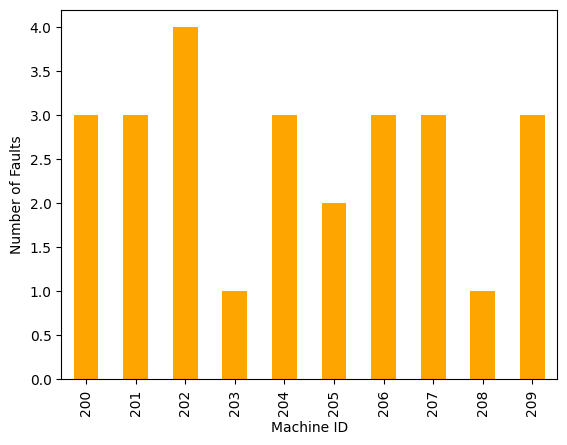

In [18]:
faults_per_machine = df.groupby("Machine_ID")["Fault_Flag"].sum()
faults_per_machine.plot(kind='bar', color='orange')
plt.xlabel("Machine ID")
plt.ylabel("Number of Faults")
plt.show()